# Clustering of crime locations

### Using as input data the crime of Chicago dataset, develop a Jupyter notebook that perform a clustering of the locations (latitude, longitude)  after asking for the number of clusters and to select at least two of the clustering algorithms in SparkML.

### The results plot shoud include in a 2D chart the centroids and the points of each cluster. Optionally, these information can be plotted on top of a map of Chicago.


In [1]:
from pyspark.ml.clustering import KMeans,BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession
import folium
print (folium.__file__)
print (folium.__version__)
from matplotlib import pyplot as plt
from matplotlib import cm
from numpy import linspace

C:\Users\raul_\Anaconda3\lib\site-packages\folium\__init__.py
0.5.0


In [2]:
sparkConf = SparkSession\
    .builder\
    .appName("Clustering Crime Location") \
    .master("local[8]")\
    .getOrCreate()

    # Loads data
data = sparkConf \
    .read \
    .format("csv") \
    .option("header", "true") \
    .option("delimiter", "\t") \
    .option("inferschema", "true") \
    .load("data\Crimes_San_Francisco.tsv")

In [3]:
#filtering null data in Latitude  Longitude
data = data.where(data.Latitude.isNotNull() & data.Longitude.isNotNull())

In [4]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: double (nullable = true)
 |-- Ward: double (nullable = true)
 |-- Community Area: double (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: double (nullable = true)
 |-- Y Coordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [5]:
#because I have a socket error connection I try to execute this sentence with exception control 
#until everything is ok
while True:
        try:
            data_frame = data \
               .rdd \
               .map(lambda x: (x[1],Vectors.dense(x[20:22]))).toDF(["id", "features"])
        except Exception: # Replace Exception with something more specific.
            continue
        else:
            break  
    

In [6]:
trainingData, testData = data_frame.randomSplit([0.7, 0.3])

In [7]:
#Enter the k
k=None
while not k:
    try:
        k=int(input("Please enter the k:"))
        if k<2:
            init_year=None
            print(" k has to be bigger than 2")
    except ValueError:
        print ('Invalid K as to be an integer')

Please enter the k:6


### KMeans Model

We will cluster and predict using Kmeans Model

In [8]:
kmeans = KMeans().setK(k).setSeed(1)
kmeans_model = kmeans.fit(trainingData)

# Evaluate clustering by computing Within Set Sum of Squared Errors.
wssse = kmeans_model.computeCost(trainingData)
print("Within Set Sum of Squared Errors = " + str(wssse))

# Shows the result
centers = kmeans_model.clusterCenters()
print("Cluster centers: ")

for center in centers:
    print(center)
    
# predict on the test set
prediction = kmeans_model.transform(testData)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(prediction)
print("Silhouette with squared euclidean distance = " + str(silhouette))
    

Within Set Sum of Squared Errors = 11057.183119803418
Cluster centers: 
[ 41.88539632 -87.72236083]
[ 41.86855921 -87.63783548]
[ 41.96564815 -87.67681953]
[ 41.73806832 -87.60436404]
[ 41.94361411 -87.77586878]
[ 41.77726024 -87.6825607 ]
Silhouette with squared euclidean distance = 0.5156063561013665


In [9]:
prediction.show()

+----+--------------------+----------+
|  id|            features|prediction|
+----+--------------------+----------+
|4763|[41.856732269,-87...|         0|
|4766|[41.751016954,-87...|         3|
|4770|[41.685034684,-87...|         3|
|4771|[41.813273802,-87...|         5|
|4773|[41.7027699419999...|         3|
|4777|[41.889535537,-87...|         0|
|4779|[41.877369643,-87...|         0|
|4780|[41.707647633,-87...|         3|
|4783|[41.86010116,-87....|         0|
|4786|[41.87025207,-87....|         0|
|4788|[41.894916924,-87...|         0|
|4789|[41.843826272,-87...|         0|
|4793|[41.783861768,-87...|         5|
|4798|[41.847252098,-87...|         0|
|4806|[41.872089887,-87...|         0|
|4813|[41.789742498,-87...|         5|
|4815|[41.863656629,-87...|         0|
|4824|[41.65884168,-87....|         3|
|4825|[41.65884168,-87....|         3|
|4826|[41.7667143080000...|         3|
+----+--------------------+----------+
only showing top 20 rows



### Bisection KMeans Model

We will cluster and predict using Bisection Kmeans Model

In [10]:
trainingData, testData = data_frame.randomSplit([0.7, 0.3])

In [11]:
bisection = BisectingKMeans().setK(k).setSeed(1)
bisection_model = bisection.fit(trainingData)

# Evaluate clustering by computing Within Set Sum of Squared Errors.
wssse = bisection_model.computeCost(trainingData)
print("Within Set Sum of Squared Errors = " + str(wssse))

# Shows the result
centers_bi = bisection_model.clusterCenters()
print("Cluster centers: ")
for center in centers_bi:
    print(center)
    
# predict on the test set
prediction_bi = bisection_model.transform(testData)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(prediction_bi)
print("Silhouette with squared euclidean distance = " + str(silhouette))
    

Within Set Sum of Squared Errors = 12168.288740254295
Cluster centers: 
[ 41.7735467  -87.68699328]
[ 41.8070144  -87.63159213]
[ 41.73145799 -87.60393171]
[ 41.86777435 -87.71236332]
[ 41.90255438 -87.64925506]
[ 41.94126628 -87.73276827]
Silhouette with squared euclidean distance = 0.28585160827468475


In [12]:
prediction_bi.show()

+----+--------------------+----------+
|  id|            features|prediction|
+----+--------------------+----------+
|4756|[41.875942734,-87...|         3|
|4757|[41.850436084,-87...|         3|
|4764|[41.751611954,-87...|         0|
|4770|[41.685034684,-87...|         2|
|4778|[41.898000005,-87...|         3|
|4779|[41.877369643,-87...|         3|
|4786|[41.87025207,-87....|         3|
|4787|[41.770990476,-87...|         0|
|4788|[41.894916924,-87...|         5|
|4789|[41.843826272,-87...|         3|
|4790|[41.863318307,-87...|         4|
|4794|[41.801124416,-87...|         0|
|4796|[41.751130513,-87...|         2|
|4798|[41.847252098,-87...|         3|
|4799|[41.873292286,-87...|         3|
|4804|[41.89626756,-87....|         3|
|4806|[41.872089887,-87...|         3|
|4807|[41.766613666,-87...|         1|
|4810|[41.8103528719999...|         3|
|4813|[41.789742498,-87...|         0|
+----+--------------------+----------+
only showing top 20 rows



In [13]:
 prediction_center = prediction \
    .groupBy("prediction") \
    .count()\
    .sort("prediction")

In [14]:
prediction_bi_center = prediction_bi \
    .groupBy("prediction") \
    .count()\
    .sort("prediction")

In [15]:
# Number de Cluster in K-Means
prediction_center.show()

+----------+------+
|prediction| count|
+----------+------+
|         0|414111|
|         1|305845|
|         2|244946|
|         3|466372|
|         4|151298|
|         5|363569|
+----------+------+



In [16]:
# Number de Cluster in Bisection K-Means
prediction_bi_center.show()

+----------+------+
|prediction| count|
+----------+------+
|         0|273171|
|         1|213512|
|         2|422181|
|         3|252417|
|         4|303706|
|         5|485259|
+----------+------+



In [17]:
list_prediction=[]
for x,y in prediction_center.collect():
    print(y)
    list_prediction.append(y)

414111
305845
244946
466372
151298
363569


In [18]:
list_prediction_bi=[]
for x,y in prediction_bi_center.collect():
    print(y)
    list_prediction_bi.append(y)

273171
213512
422181
252417
303706
485259


### Plotting Centroids in a 2D Chart

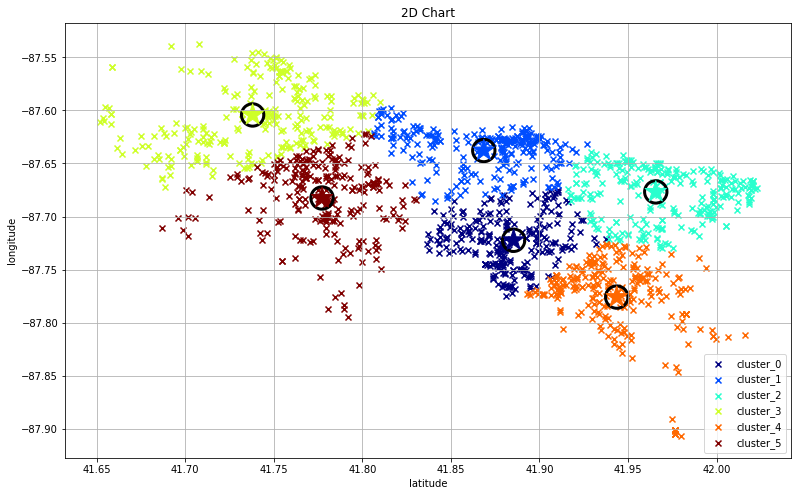

In [19]:
cm_subsection = linspace(0.0, 1.0, k) 
#color_list=['yellow','blue','red','orange','green','brown','cyan','pink','magenta','black']  
color_list = [ cm.jet(x) for x in cm_subsection ]

plt.figure(figsize=(13,8))

  
for i in range (0,k):
    list_x=[]
    list_y=[]
    list_cluster=[]
    cluster_pre=prediction.select("features","prediction").where(prediction.prediction==i).limit(250)
    for x,y in cluster_pre.collect():
        list_x.append(x[0])
        list_y.append(x[1])
    clusterlabel="cluster_"+str(i)
    plt.scatter(list_x, list_y,c=color_list[i],marker="x",label=clusterlabel)

#plotting centroids
center_x=[]
center_y=[]
color_c=[]
cont=0
for x,y in centers:
    center_x.append(x)
    center_y.append(y)
    color_c.append(color_list[cont])
    cont += 1    
plt.scatter(center_x, center_y, s=500, facecolors='none', edgecolors='black', marker="o",linewidths=3)
plt.scatter(center_x, center_y, s=500, c=color_c, marker="*")
plt.title('2D Chart')
plt.legend(loc='lower right')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.grid()
plt.show()

### Plotting Centroids in the map of Chicago using folium library

In [20]:
print(color_c)

[(0.0, 0.0, 0.5, 1.0), (0.0, 0.3, 1.0, 1.0), (0.16129032258064513, 1.0, 0.8064516129032259, 1.0), (0.8064516129032256, 1.0, 0.16129032258064513, 1.0), (1.0, 0.40740740740740755, 0.0, 1.0), (0.5, 0.0, 0.0, 1.0)]


In [21]:
# Set general coordinates of Chicago city
CH_COORDINATES = (41.85, -87.65) ## Chicago Coordinates

In [22]:
m = folium.Map(location=CH_COORDINATES, zoom_start=12)

In [23]:
#This function scale a point x in (in_min,in_max)-> y in (out_min,out_max))
#we will use this function to scale the radious with the list of predictions
def remap(x, in_min, in_max, out_min, out_max):
  return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

In [24]:
#Calculation the values to scale the radious
in_min=min(list_prediction)
in_max=max(list_prediction)
out_max=4000
out_min=800

In [25]:
#Painting the markers and circles in the map
#for Kmeans clustering
i=0
for center in centers:
    folium.Marker(
        location = center,
        popup="Centroid:"+str(i),
        icon=folium.Icon(color='blue')).add_to(m)
    
    folium.Circle(
        radius=remap(list_prediction[i],in_min,in_max,out_min,out_max),
        location=center,
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(m)
    
    i+=1

In [26]:
#Painting the markers and circles in the map
#for Bisection Kmeans clustering
i=0
for center in centers_bi:
    folium.Marker(
        location = center,
        popup="Centroid:"+str(i),
        icon=folium.Icon(color='green')).add_to(m)

    folium.Circle(
        radius=remap(list_prediction_bi[i],in_min,in_max,out_min,out_max),
        location=center,
        color='#ccffeb',
        fill=True,
        fill_color='#ccffeb'
    ).add_to(m)
    
    i+=1

In [27]:
folium.LayerControl().add_to(m)

In [28]:
m

In [29]:
filename='C:\\Users\\raul_\Downloads\\map_chicagoclustering.html'
m.save(outfile=filename)
import webbrowser
webbrowser.open_new_tab(filename)

True

In [30]:
#sparkConf.stop()